# 导入包

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.tsa as tsa
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读入数据
- 对数据进行读入操作
- 对数据进行异常值清洗
- 观测数据
## 对数据进行读入操作

In [4]:
import pandas as pd

# 读取第一个CSV文件
data1 = pd.read_csv(r'E:\PythonCode\DeepLearning\Time_Series\data\experment_02\PeMS04_sensor7_flow_3h.csv')

# 读取第二个CSV文件
data2 = pd.read_csv(r'E:\PythonCode\DeepLearning\Time_Series\data\experment_02\PeMS04_sensor94_flow_3h.csv')

# 将时间列的数据类型更改为datetime
data1['time'] = pd.to_datetime(data1['time'])
data2['time'] = pd.to_datetime(data2['time'])

# 显示第一个表格的信息
data1.info()

# 显示第一个表格的前3行数据
data1.head(3)

# 显示第一个表格的后3行数据
data1.tail(3)

# 显示第二个表格的信息
data2.info()

# 显示第二个表格的前3行数据
data2.head(3)

# 显示第二个表格的后3行数据
data2.tail(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    168 non-null    datetime64[ns]
 1   flow    168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    169 non-null    datetime64[ns]
 1   flow    169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


,time,flow
166,2018-02-09 18:00:00,14354.0
167,2018-02-09 21:00:00,7255.0
168,2018-02-10 00:00:00,2524.0


## 数据清洗
### 对数据进行清洗去除0和空值

In [5]:
# 删除值为零的数据，将其替换为缺失值，然后使用前向填充方法填充缺失值

# 对第一个数据框 data1 进行处理
df1 = data1.mask(data1 == 0).fillna(method='ffill')

# 对第二个数据框 data2 进行处理
df2 = data2.mask(data2 == 0).fillna(method='ffill')


# 数据的可视化处理

Index(['time', 'flow'], dtype='object')


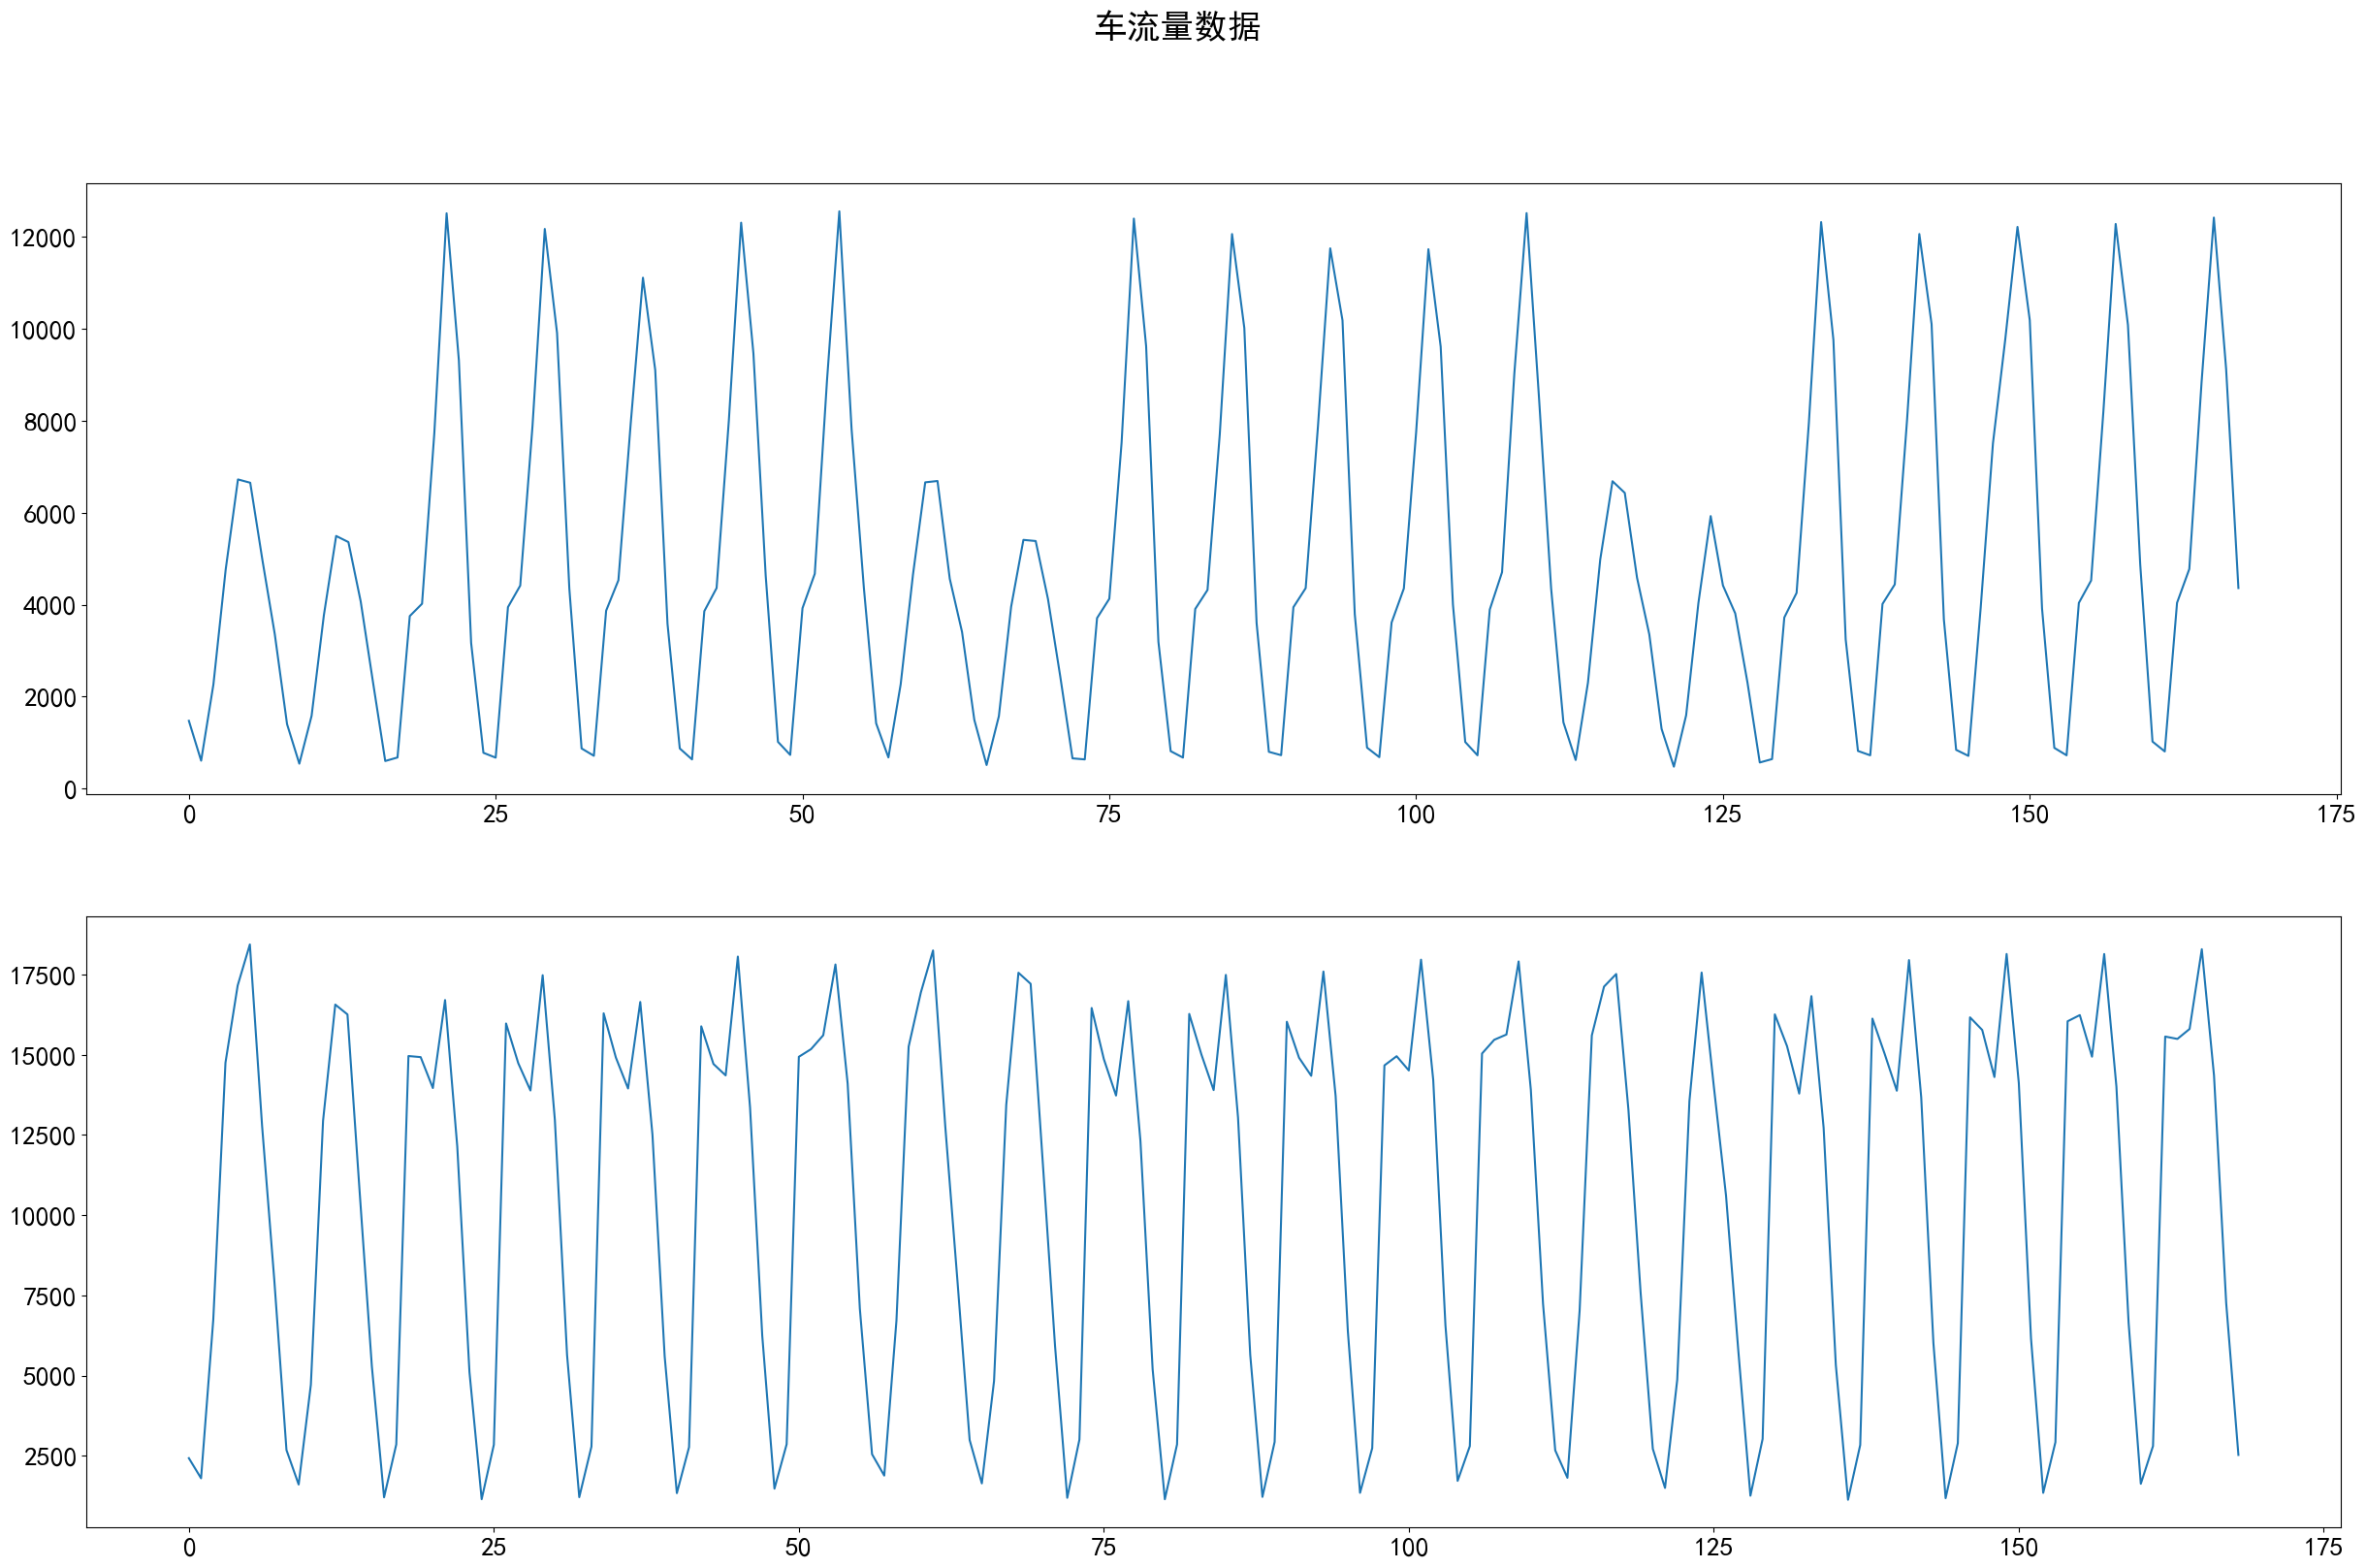

In [6]:
import matplotlib.pyplot as plt

# 创建包含两个子图的图形对象
fig, ax = plt.subplots(2, 1, figsize=(30, 18))
axes = ax.flatten()

# 设置整个图的标题
fig.suptitle("车流量数据", fontsize=25)

# 获取 df1 的列名
keys1 = df1.keys()

# 绘制 df1 的车流量数据
for key_index in range(len(keys1)):
    if key_index == 0:
        continue
    key = keys1[key_index]
    df1[key].plot(ax=axes[key_index-1], fontsize=20)

# 获取 df2 的列名
keys2 = df2.keys()

# 绘制 df2 的车流量数据
for key_index in range(len(keys2)):
    if key_index == 0:
        continue
    key = keys2[key_index]
    df2[key].plot(ax=axes[key_index], fontsize=20)

# 设置 df1 和 df2 的时间列为索引列
df2.set_index('time', inplace=True)
df1.set_index('time', inplace=True)


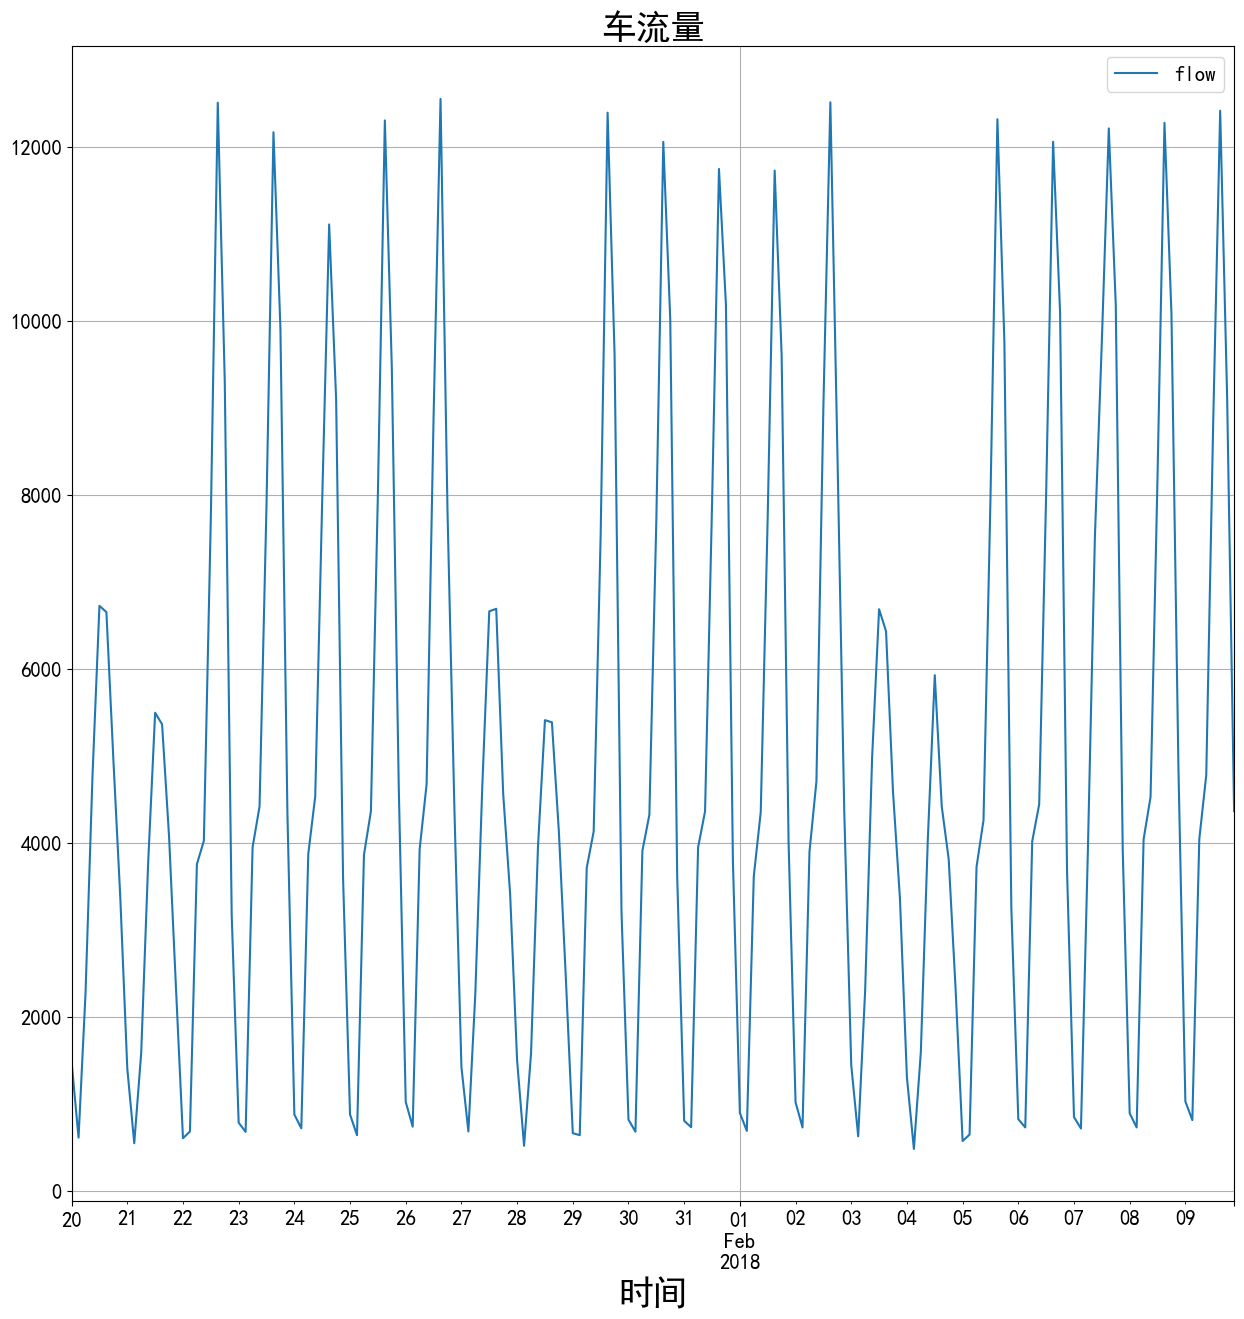

In [7]:
# 获取 'sensor7' 列的数据
sensor7 = df1['flow']

# 创建绘图对象
fig, ax = plt.subplots(figsize=(15, 15))

# 绘制时间序列图
sensor7.plot(ax=ax, fontsize=15)

# 设置图的标题、X轴标签、Y轴标签
ax.set_title("车流量", fontsize=25)
ax.set_xlabel("时间", fontsize=25)
ax.set_ylabel("车流量", fontsize=25)

# 添加图例并设置字体大小
ax.legend(loc='best', fontsize=15)

# 添加网格线
ax.grid()


# 确认季节性和平稳性
## 确认季节性

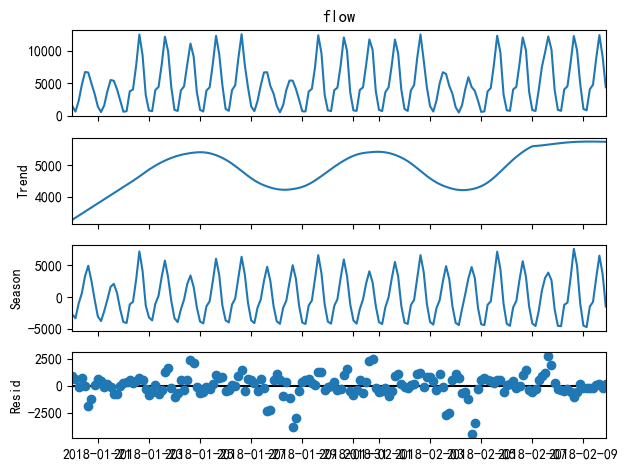

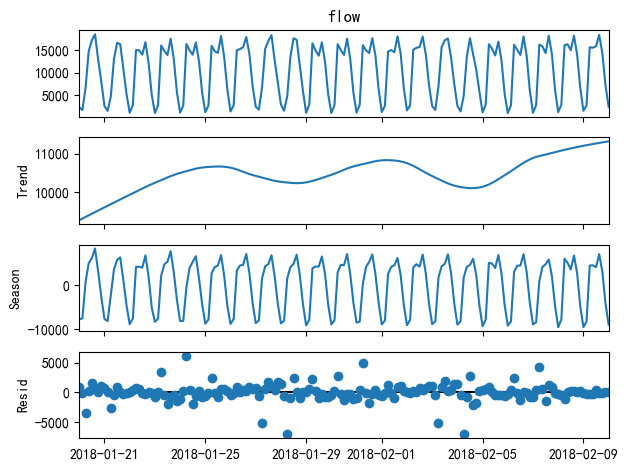

Test Statistic                 -3.368380
p-value                         0.012085
#Lag Used                      10.000000
Number of Observation Used    157.000000
Critical Value (1%)            -3.472703
Critical Value (5%)            -2.880132
Critical Value (10%)           -2.576683
dtype: float64
{'1%': -3.472703119504854, '5%': -2.880131672353732, '10%': -2.5766826861130268}
不是平稳的
Test Statistic                 -2.363583
p-value                         0.152280
#Lag Used                       9.000000
Number of Observation Used    159.000000
Critical Value (1%)            -3.472161
Critical Value (5%)            -2.879895
Critical Value (10%)           -2.576557
dtype: float64
{'1%': -3.472161410886292, '5%': -2.8798954259680936, '10%': -2.5765565828092245}
不是平稳的


False

In [8]:
# 从数据中提取 'flow' 列
flow1 = df1['flow']
flow2 = df2['flow']

import statsmodels.tsa as tsa
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL

# 使用STL分解流量数据并拟合分解模型
res1 = STL(flow1).fit()
res2 = STL(flow2).fit()

# 绘制STL分解的结果
res1.plot()
res2.plot()

# 获取趋势、季节性和残差数据
trend1 = res1.trend
seasonal1 = res1.seasonal
residual1 = res1.resid

trend2 = res2.trend
seasonal2 = res2.seasonal
residual2 = res2.resid

# 显示图形
plt.show()

# 定义平稳性检验函数
def test_stationarity(timeseries, alpha=1e-3):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lag Used', 'Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    print(dftest[4])
    
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    pvalue = dftest[1]
    
    if pvalue < alpha and test_statistic < critical_value:
        print("时间序列是平稳的")
        return True
    else:
        print("时间序列不是平稳的")
        return False

# 对 'flow1' 和 'flow2' 进行平稳性检验
test_stationarity(flow1)
test_stationarity(flow2)


- res1 为 sensor7的季节分解的结果
- res2 为 sensor94的季节分解的结果
- res3 为 senor7的平稳序列的再次季节分解的结果
- 通过检测结果可见PeMS04_7 周期为9 PeMs04_94其周期性为 10 
- PeMS04_7 而次周期为14

## 平稳性检测
### sensor7

In [9]:
# 从 'flow1' 数据中提取 'sensor7' 列
sensor7 = flow1

# 一阶差分
sensor7_diff1 = sensor7.diff(1)

# 12步差分
sensor7_seasonal_1 = sensor7_diff1.diff(10)
sensor7_seasonal_2 = sensor7_seasonal_1.diff(14)

# 对季节性差分后的数据进行平稳性检验
test_stationarity(sensor7_seasonal_2.dropna())

Test Statistic                 -4.238266
p-value                         0.000567
#Lag Used                      13.000000
Number of Observation Used    129.000000
Critical Value (1%)            -3.482088
Critical Value (5%)            -2.884219
Critical Value (10%)           -2.578864
dtype: float64
{'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}
X 是平稳的


True

### sensor94

In [10]:
# sensor94
# 一阶差分
sensor94_diff1 = flow2.diff(1)
# 12步差分
sensor94_seasonal = sensor94_diff1.diff(9)
# sensor94_seasonal = sensor94_seasonal.diff(66)
test_stationarity(sensor94_seasonal.dropna())

Test Statistic               -1.014791e+01
p-value                       8.093951e-18
#Lag Used                     8.000000e+00
Number of Observation Used    1.500000e+02
Critical Value (1%)          -3.474715e+00
Critical Value (5%)          -2.881009e+00
Critical Value (10%)         -2.577151e+00
dtype: float64
{'1%': -3.474714913481481, '5%': -2.881008708148148, '10%': -2.5771508444444446}
X 是平稳的


True

## 噪声检验
### sensor94_seasonal

In [11]:
import statsmodels.api as sm

# 白噪声检测函数
def test_white_noise(data):
    return sm.stats.acorr_ljungbox(data.dropna(), return_df=True)

# 对季节性差分后的数据进行白噪声检测
result = test_white_noise(sensor7_seasonal_1)

# 打印白噪声检测结果
print(result)


       lb_stat     lb_pvalue
1    26.129574  3.192566e-07
2    40.541604  1.572181e-09
3    65.408055  4.102709e-14
4    88.055248  3.408198e-18
5   115.658852  2.604965e-23
6   124.523582  1.825615e-24
7   151.391945  2.070862e-29
8   273.557637  1.726549e-54
9   296.317469  1.576490e-58
10  308.516289  2.458411e-60


### sensor94_seasonal

In [12]:
# 对季节性差分后的数据进行白噪声检测
print(test_white_noise(sensor94_seasonal))

       lb_stat     lb_pvalue
1     1.439167  2.302742e-01
2    20.793822  3.052663e-05
3    20.949298  1.078596e-04
4    24.829424  5.444279e-05
5    25.374042  1.179705e-04
6    38.108030  1.070034e-06
7    38.457438  2.479907e-06
8   151.679720  8.749803e-29
9   157.517346  2.434578e-29
10  168.084690  6.911444e-31


2个数据都小于阈值0.01为均非白噪声序列
# 建立SARIMA模型
## 图解法定阶
### sensor7

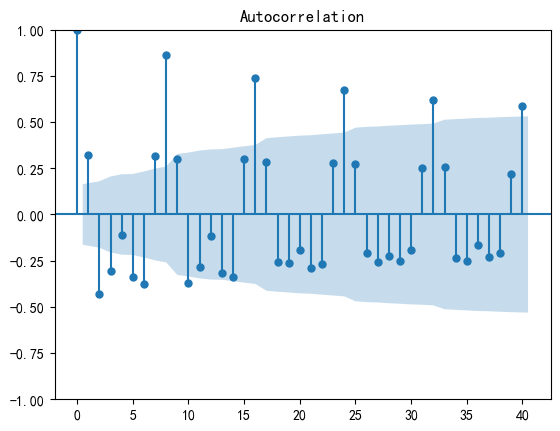

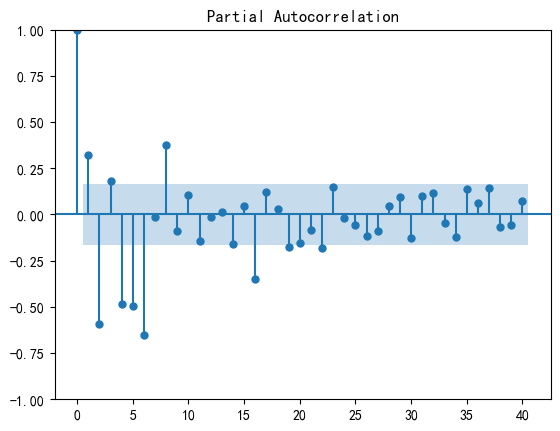

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 使用 plot_acf 绘制 ACF 图
fig_acf = plot_acf(sensor7_seasonal_2.dropna(), lags=40)

# 使用 plot_pacf 绘制 PACF 图
fig_pacf = plot_pacf(sensor7_seasonal_2.dropna(), lags=40)

# 显示图形
fig_acf.show()
fig_pacf.show()


### sensor94

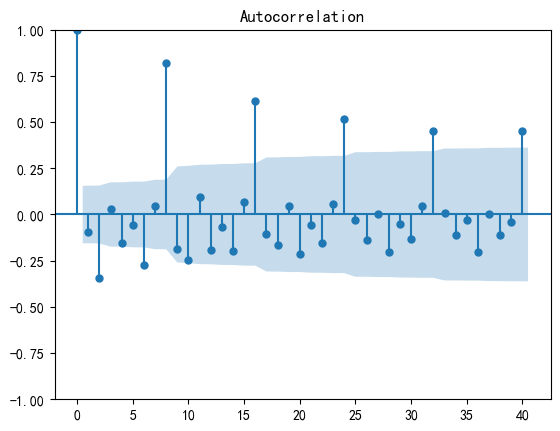

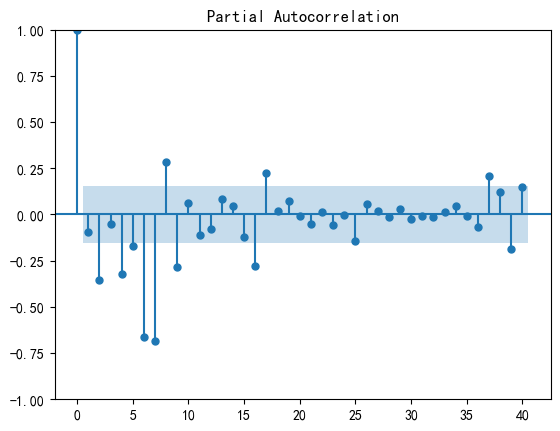

In [14]:

# 使用 plot_acf 绘制 ACF 图
fig1 = plot_acf(sensor94_seasonal.dropna(),lags=40)

# 使用 plot_pacf 绘制 PACF 图
fig1 = plot_pacf(sensor94_seasonal.dropna(),lags=40)

#显示图片
fig1.show()

# sensor7_seasonal_2
- ACF 拖尾
- PACF 2阶截尾
# sensor94
- ACF 拖尾
- PACF 拖尾
## 网格法搜索
### sensor7

In [15]:
import itertools
import math

def grid_search(data, s=10):
    # 定义要搜索的参数范围
    p = q = range(0, 3)
    s = [s]
    d = [1]
    
    # 创建参数组合列表
    PDQs = list(itertools.product(p, d, q, s))
    pdq = list(itertools.product(p, d, q))
    
    params = []
    seasonal_params = []
    results = []
    grid = pd.DataFrame()
    
    # 遍历参数组合
    for param in pdq:
        for seasonal_param in PDQs:
            # 构建 SARIMA 模型
            mod = tsa.statespace.sarimax.SARIMAX(data, order=param, seasonal_order=seasonal_param, 
                                                enforce_stationarity=False, enforce_invertibility=False)
            result = mod.fit()
            
            # 打印每个参数组合的 AIC 值
            print("ARIMA{}x{}-AIC:{}".format(param, seasonal_param, result.aic))
            
            # 存储参数和对应的 AIC 值
            params.append(param)
            seasonal_params.append(seasonal_param)
            results.append(math.fabs(result.aic))
    
    # 创建一个 DataFrame 以存储结果
    grid['pdq'] = params
    grid['PDQs'] = seasonal_params
    grid['aic'] = results
    
    # 找到最小 AIC 值对应的参数组合
    best_params = grid[grid['aic'] == grid['aic'].min()]
    print(best_params)




------flow1------ sensor7


In [16]:
# 调用参数搜索函数
grid_serch(flow1)

ARIMA(0, 1, 0)x(0, 1, 0, 10)-AIC:3065.589243023669
ARIMA(0, 1, 0)x(0, 1, 1, 10)-AIC:2797.3114637911713
ARIMA(0, 1, 0)x(0, 1, 2, 10)-AIC:2606.3460658694266
ARIMA(0, 1, 0)x(1, 1, 0, 10)-AIC:2884.415227490419
ARIMA(0, 1, 0)x(1, 1, 1, 10)-AIC:2795.393678915382
ARIMA(0, 1, 0)x(1, 1, 2, 10)-AIC:2581.391862782798
ARIMA(0, 1, 0)x(2, 1, 0, 10)-AIC:2634.3190525746095
ARIMA(0, 1, 0)x(2, 1, 1, 10)-AIC:2565.841058374356
ARIMA(0, 1, 0)x(2, 1, 2, 10)-AIC:2505.661107582131
ARIMA(0, 1, 1)x(0, 1, 0, 10)-AIC:2971.460448624456
ARIMA(0, 1, 1)x(0, 1, 1, 10)-AIC:2732.545230585399
ARIMA(0, 1, 1)x(0, 1, 2, 10)-AIC:2496.5626679563475
ARIMA(0, 1, 1)x(1, 1, 0, 10)-AIC:2806.6129787305617
ARIMA(0, 1, 1)x(1, 1, 1, 10)-AIC:2687.0882308331497
ARIMA(0, 1, 1)x(1, 1, 2, 10)-AIC:2502.1178458615486
ARIMA(0, 1, 1)x(2, 1, 0, 10)-AIC:2578.611350930297
ARIMA(0, 1, 1)x(2, 1, 1, 10)-AIC:2503.5167680177105
ARIMA(0, 1, 1)x(2, 1, 2, 10)-AIC:2461.995922753759
ARIMA(0, 1, 2)x(0, 1, 0, 10)-AIC:2938.298674305822
ARIMA(0, 1, 2)x(0, 1, 1

### sensor94

In [17]:
# 调用参数搜索函数
grid_serch(flow2)

------flow2------ sensor94
ARIMA(0, 1, 0)x(0, 1, 0, 10)-AIC:3294.6845625250908
ARIMA(0, 1, 0)x(0, 1, 1, 10)-AIC:2997.698729523575
ARIMA(0, 1, 0)x(0, 1, 2, 10)-AIC:2793.05067421027
ARIMA(0, 1, 0)x(1, 1, 0, 10)-AIC:3084.932977646804
ARIMA(0, 1, 0)x(1, 1, 1, 10)-AIC:2988.1071444768313
ARIMA(0, 1, 0)x(1, 1, 2, 10)-AIC:2788.671932089189
ARIMA(0, 1, 0)x(2, 1, 0, 10)-AIC:2841.3746294158386
ARIMA(0, 1, 0)x(2, 1, 1, 10)-AIC:2769.458793085468
ARIMA(0, 1, 0)x(2, 1, 2, 10)-AIC:2746.6976395819584
ARIMA(0, 1, 1)x(0, 1, 0, 10)-AIC:3241.6219612851946
ARIMA(0, 1, 1)x(0, 1, 1, 10)-AIC:2969.854443621701
ARIMA(0, 1, 1)x(0, 1, 2, 10)-AIC:2762.322598981324
ARIMA(0, 1, 1)x(1, 1, 0, 10)-AIC:3058.418654598813
ARIMA(0, 1, 1)x(1, 1, 1, 10)-AIC:2970.356086850265
ARIMA(0, 1, 1)x(1, 1, 2, 10)-AIC:2715.8181013583594
ARIMA(0, 1, 1)x(2, 1, 0, 10)-AIC:2834.223268518963
ARIMA(0, 1, 1)x(2, 1, 1, 10)-AIC:2799.7661980080875
ARIMA(0, 1, 1)x(2, 1, 2, 10)-AIC:2751.9591630110926
ARIMA(0, 1, 2)x(0, 1, 0, 10)-AIC:3159.1368126473

- sensor7最优 (2, 1, 2)  (1, 1, 2, 10)  2376.575548
- sensor94最优(2, 1, 2)  (0, 1, 2, 10)  2578.750973
# 建立模型sensor7

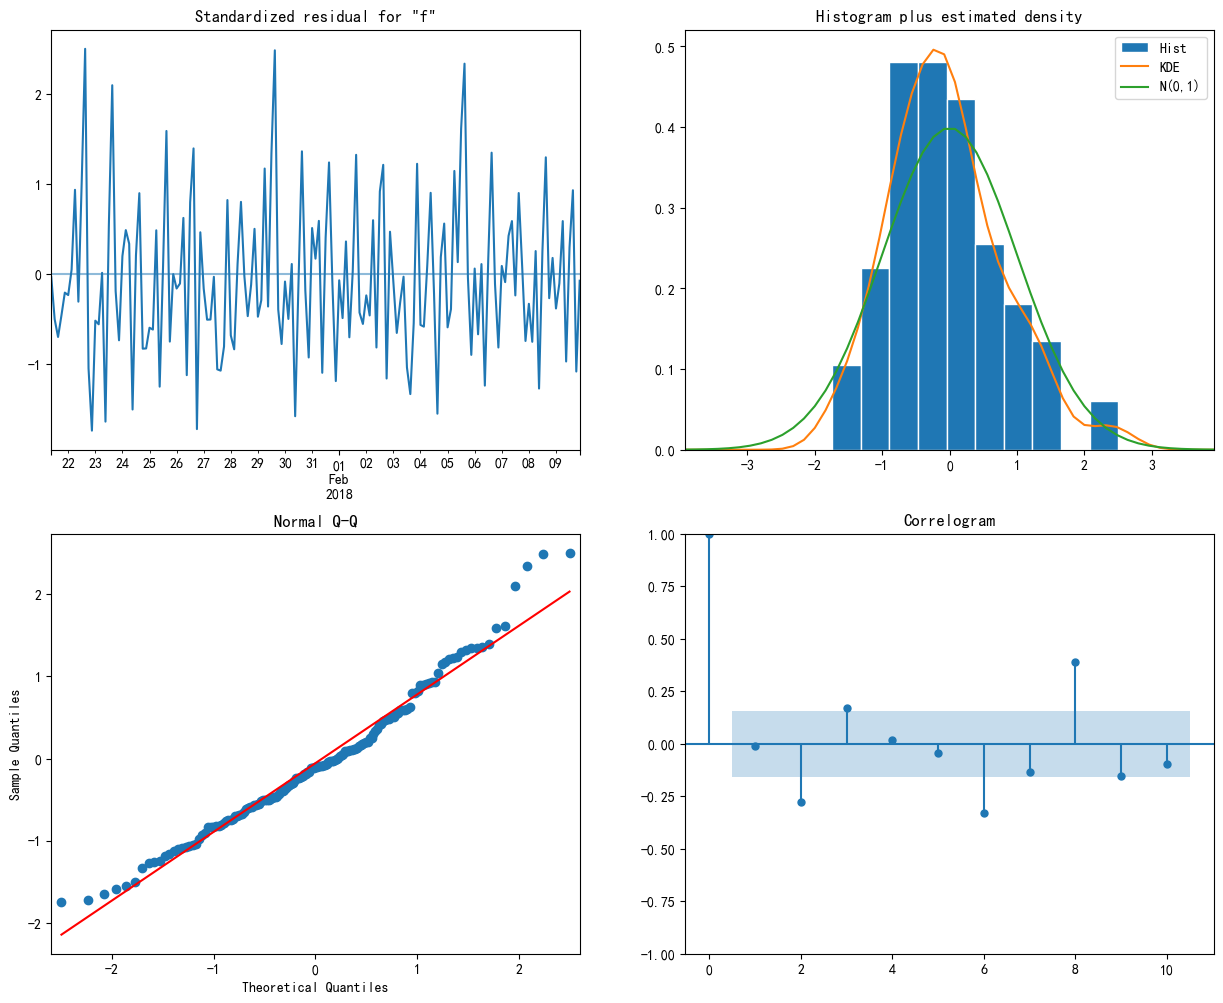

In [18]:
# 创建 SARIMA 模型并拟合数据
mod = tsa.statespace.sarimax.SARIMAX(flow1, order=(2, 1, 2), seasonal_order=(1, 1, 2, 10))
results1 = mod.fit()

# 执行白噪声检测
test_white_noise(results1.resid)

# 绘制诊断图
fig_result = results1.plot_diagnostics(figsize=(15, 12))

#模型效果

RMSE:2227433.605583157
RMSE:1492.4589125276302
RMSE:9319881.897067966
RMSE:3052.848161482645
单步预测结果


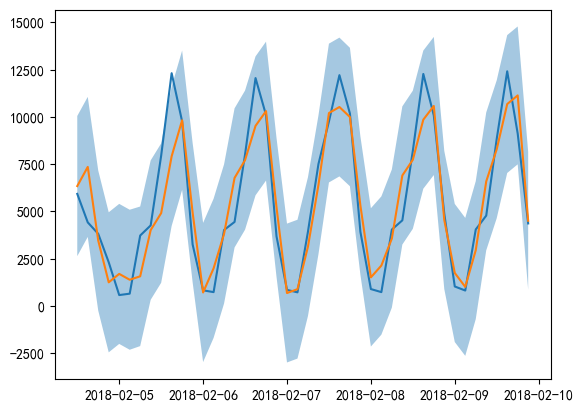

多步预测结果


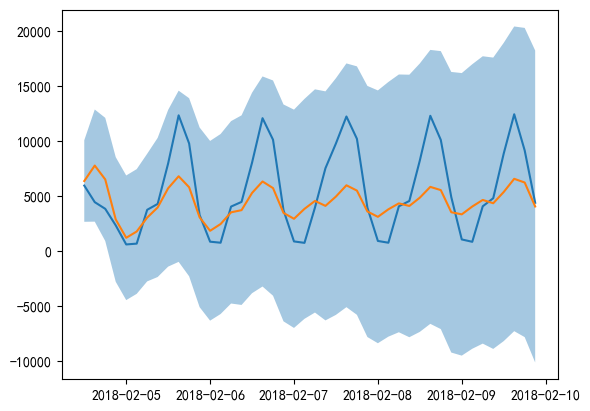

In [19]:
from sklearn.metrics import mean_squared_error

# 定义获取预测结果的函数
def get_prediction(data, results, start, dynamic=False):
    pred = results.get_prediction(start=start, dynamic=dynamic, full_results=True)
    pred_ci = pred.conf_int()
    forecast = pred.predicted_mean
    truth = data[start:]
    pred_concat = pd.concat([truth, forecast, pred_ci], axis=1)
    pred_concat.columns = ['true', 'pred', 'up', 'low']
    rmse = np.sqrt(mean_squared_error(truth, forecast))
    print('RMSE: {}'.format(rmse))
    return pred_concat

# 定义绘制预测结果的函数
def plot_prediction(pred_concat):
    plt.fill_between(pred_concat.index, pred_concat['up'], pred_concat['low'], alpha=0.4, label='pred_range')
    plt.plot(pred_concat['true'], label='true')
    plt.plot(pred_concat['pred'], label='pred')
    plt.legend()
    plt.show()

# 定义进行预测的函数
def predict(data, results):
    # 单步预测
    pres_1 = get_prediction(data, results, '2018-02-04 12:00:00')
    
    # 多步预测（动态预测）
    pres_2 = get_prediction(data, results, '2018-02-04 12:00:00', dynamic=True)
    
    print("单步预测结果")
    plot_prediction(pres_1)
    print("多步预测结果")
    plot_prediction(pres_2)

# 调用进行预测的函数
predict(flow1, results1)


# 建立模型flow2

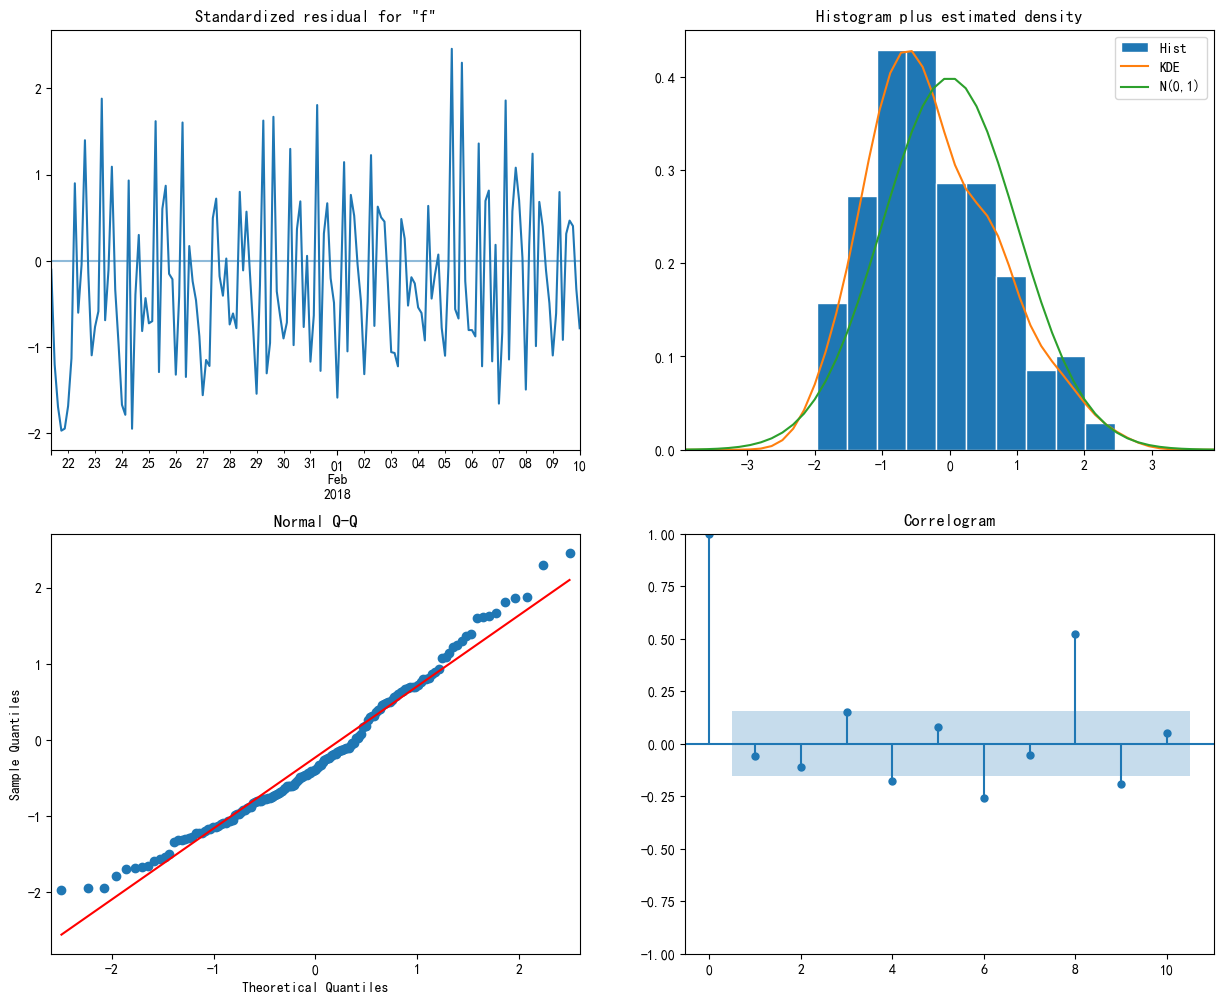

In [20]:
# 创建 SARIMA 模型并拟合数据
mod = tsa.statespace.sarimax.SARIMAX(flow2, order=(2, 1, 2), seasonal_order=(0, 1, 2, 10))
results2 = mod.fit()

# 执行白噪声检测
test_white_noise(results2.resid)

# 绘制诊断图
fig_result = results2.plot_diagnostics(figsize=(15, 12))

# 模型预测

RMSE:10733663.87124257
RMSE:3276.2270787054076
RMSE:34350695.94929169
RMSE:5860.946676885202
单步预测结果


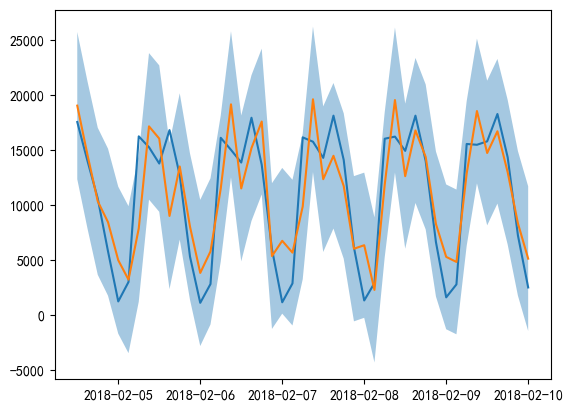

多步预测结果


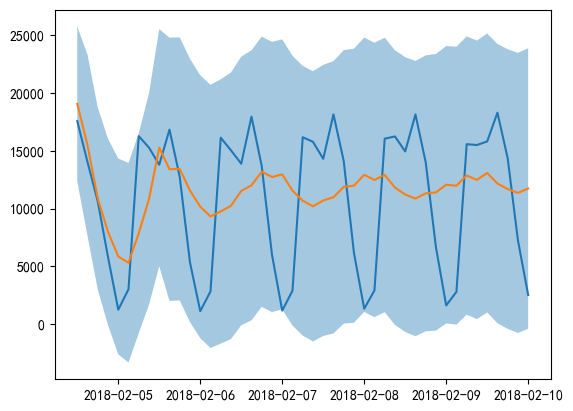

In [21]:
predict(flow2,results2)

# 最终预测结果展示
## sensor7

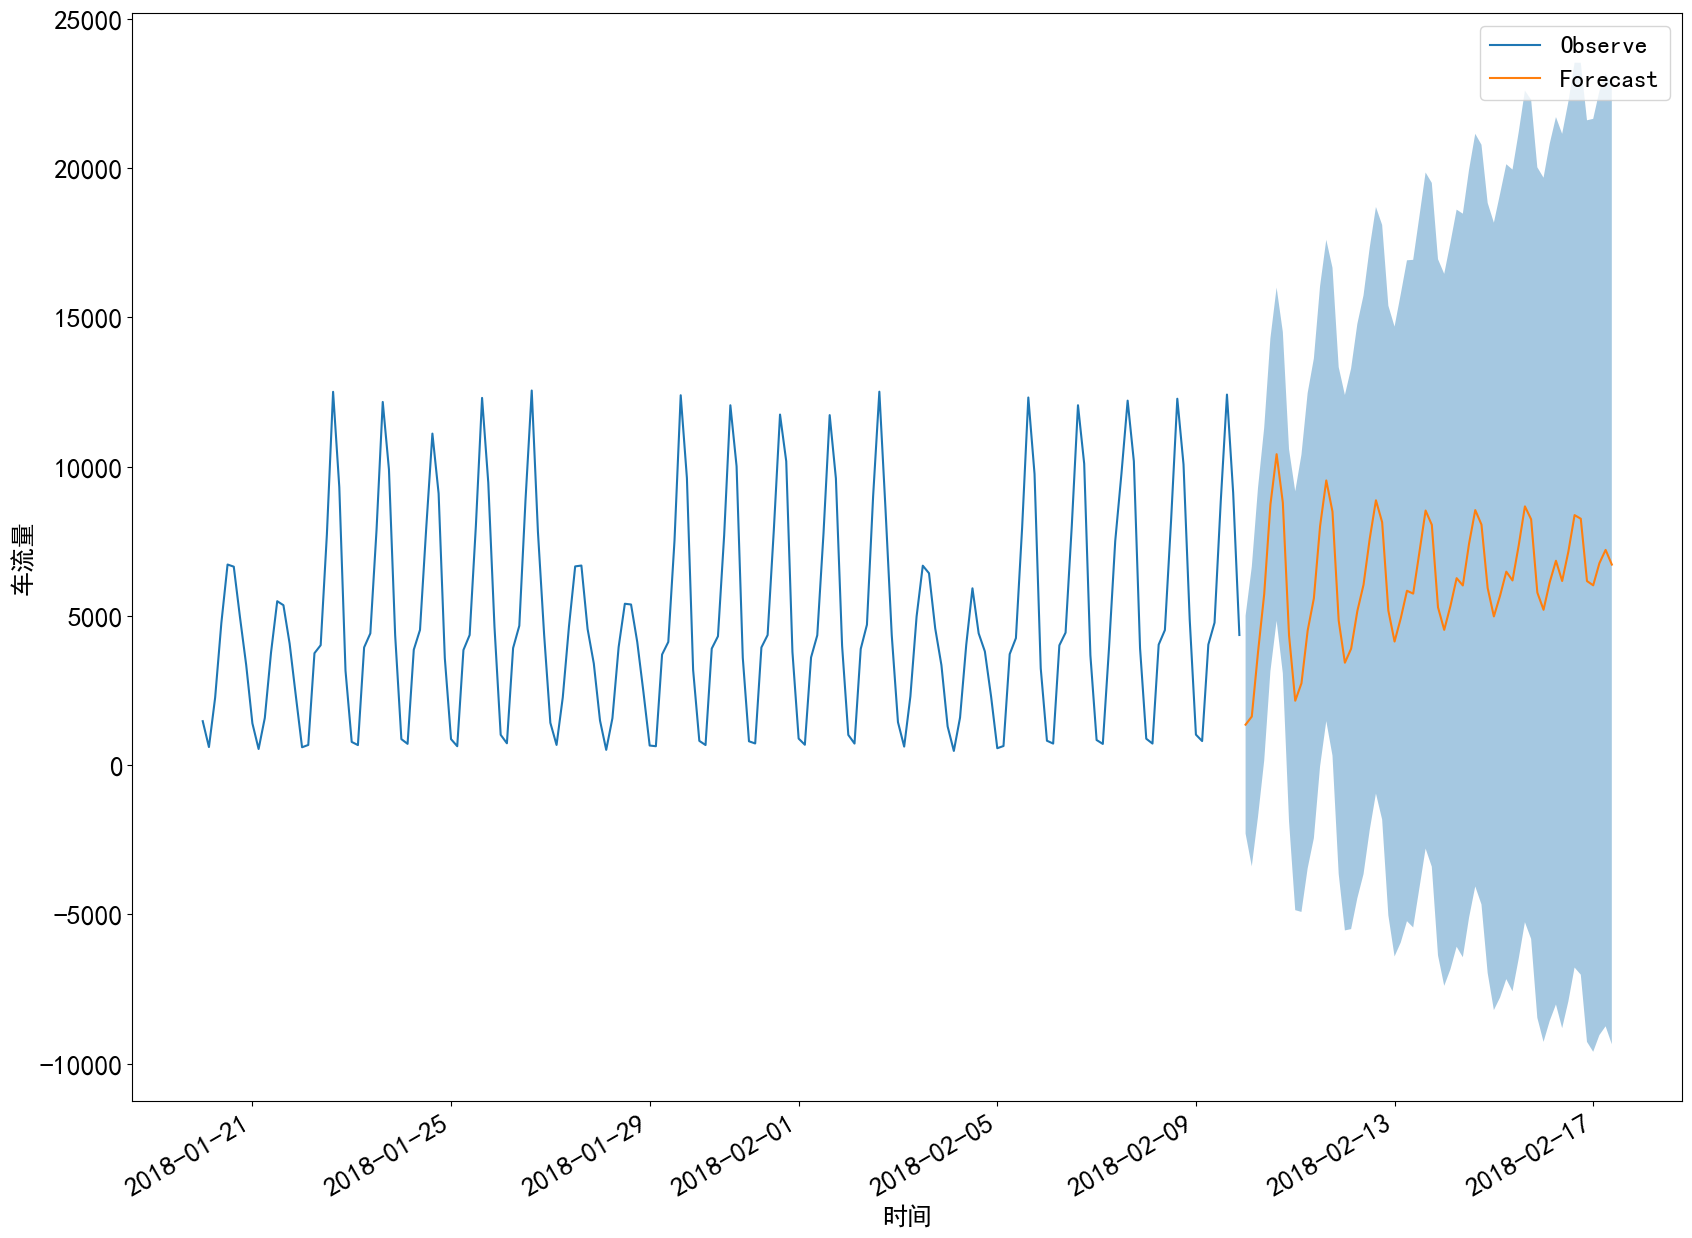

In [45]:
# 获取未来60个时间步的预测值
forecast = results1.get_forecast(steps=60)

# 创建绘图
fig, ax = plt.subplots(figsize=(20, 16))

# 绘制观察值
ax.plot(flow1, label='Observe')

# 绘制预测值
forecast.predicted_mean.plot(ax=ax, label='Forecast')

# 填充置信区间
ax.fill_between(forecast.conf_int().index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], alpha=0.4)

# 设置 x 轴和 y 轴标签
ax.set_xlabel("时间", fontsize=18)
ax.set_ylabel("车流量", fontsize=18)

# 添加图例
ax.legend(loc='best', fontsize=18)

# 设置 x 轴和 y 轴刻度的字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# 显示图形
plt.show()


## sensor94

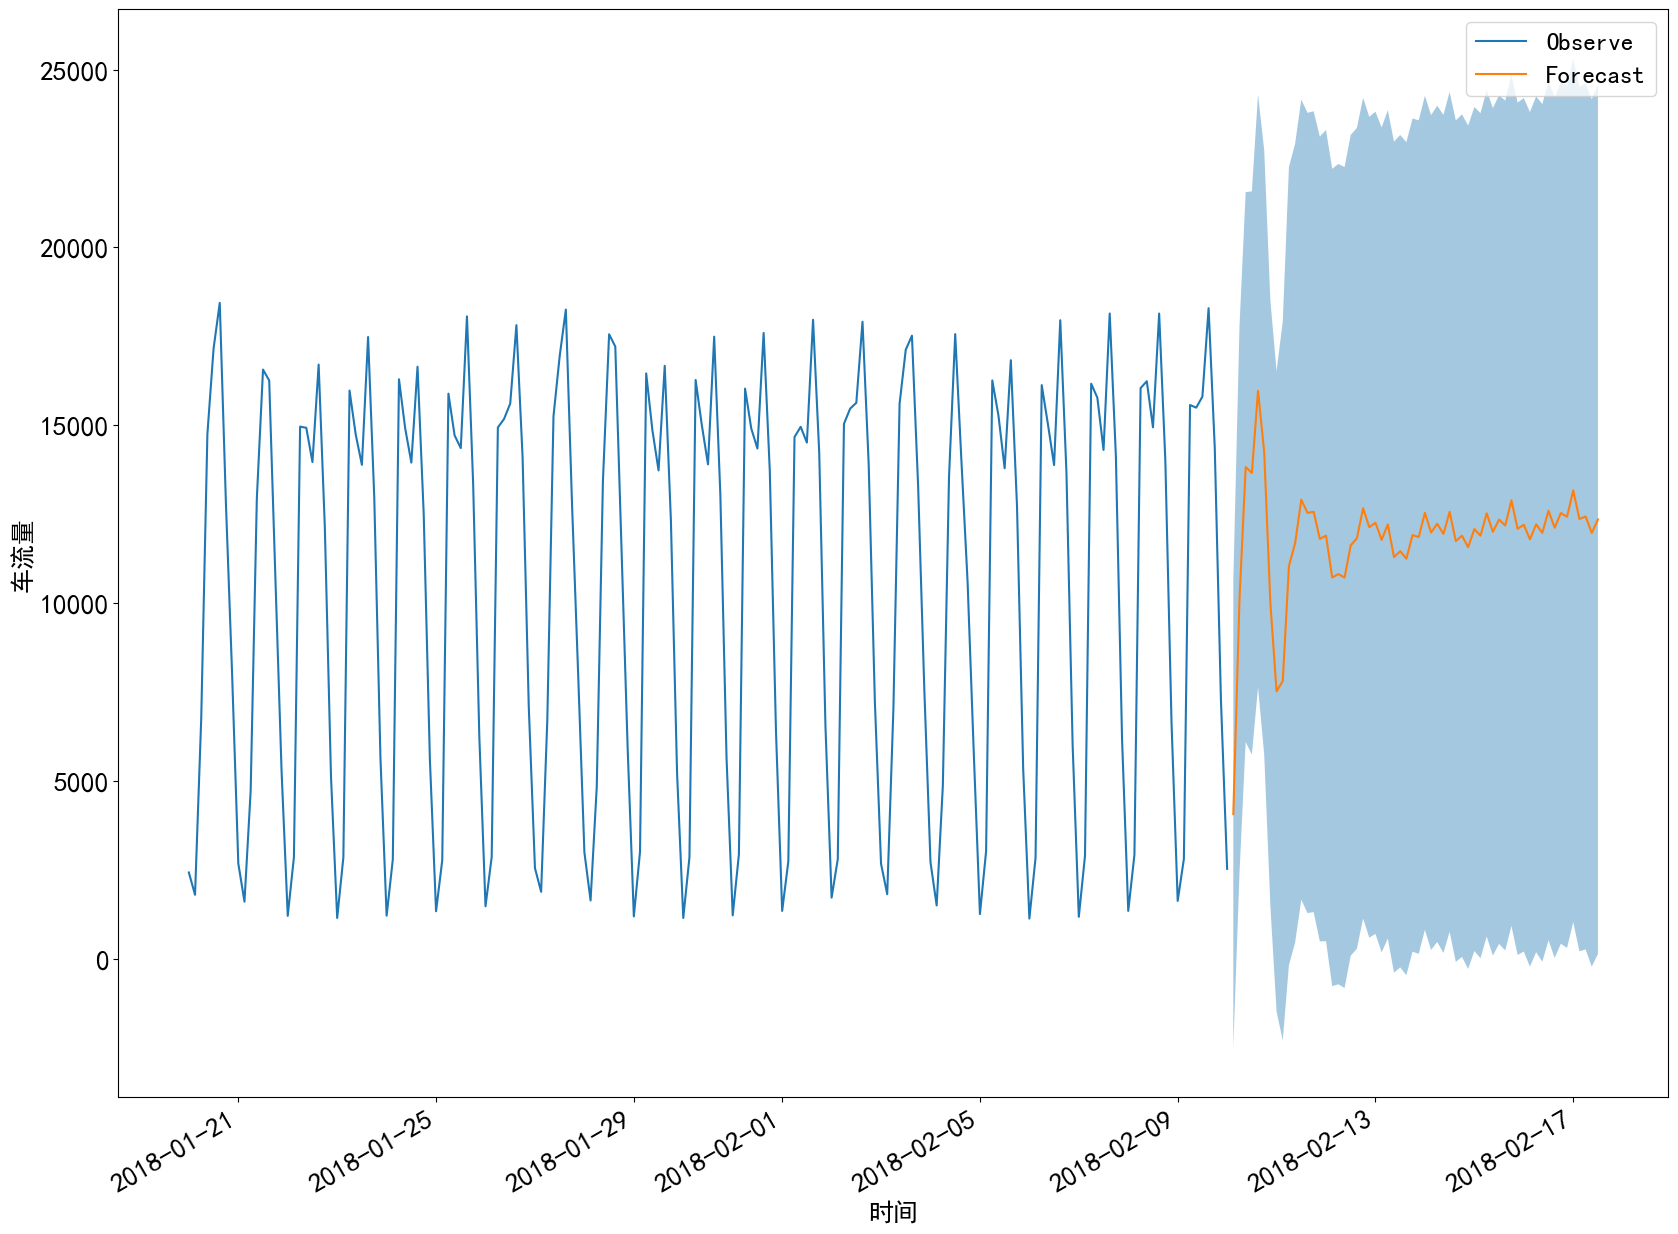

In [23]:
# 获取未来60个时间步的预测值
forecast = results2.get_forecast(steps=60)

# 创建绘图
fig, ax = plt.subplots(figsize=(20, 16))

# 绘制观察值
ax.plot(flow2, label='Observe')

# 绘制预测值
forecast.predicted_mean.plot(ax=ax, label='Forecast')

# 填充置信区间
ax.fill_between(forecast.conf_int().index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], alpha=0.4)

# 设置 x 轴和 y 轴标签
ax.set_xlabel("时间", fontsize=18)
ax.set_ylabel("车流量", fontsize=18)

# 添加图例
ax.legend(loc='best', fontsize=18)

# 设置 x 轴和 y 轴刻度的字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# 显示图形
plt.show()


# 优化方法
我很遗憾的注意到了，sensor7是由2个周期数据组成，导致模型精度过低，降低了模型的性能，针对此现象我对模型进行了如下优化
- 进行STL分解

Test Statistic                 -3.195157
p-value                         0.020267
#Lag Used                       3.000000
Number of Observation Used    164.000000
Critical Value (1%)            -3.470866
Critical Value (5%)            -2.879330
Critical Value (10%)           -2.576255
dtype: float64
{'1%': -3.47086589632514, '5%': -2.879330279087651, '10%': -2.57625492712671}
不是平稳的
Test Statistic               -6.130386e+00
p-value                       8.429725e-08
#Lag Used                     1.200000e+01
Number of Observation Used    1.550000e+02
Critical Value (1%)          -3.473259e+00
Critical Value (5%)          -2.880374e+00
Critical Value (10%)         -2.576812e+00
dtype: float64
{'1%': -3.4732590518613002, '5%': -2.880374082105334, '10%': -2.5768120811654525}
X 是平稳的
time
2018-01-20 00:00:00    3264.909172
2018-01-20 03:00:00    3329.962849
2018-01-20 06:00:00    3395.236306
2018-01-20 09:00:00    3460.668508
2018-01-20 12:00:00    3526.188865
                          ...

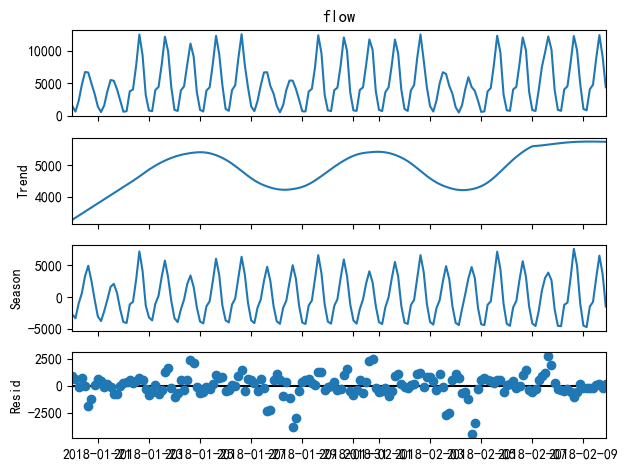

In [32]:

res1 = STL(flow1).fit()
res1.plot()

trend1 = res1.trend
seasonal1 = res1.seasonal
residual1 = res1.resid
test_stationarity(trend1)
test_stationarity(seasonal1)
print(trend1)


# 此时我们注意到 trend序列存在任然存在一定的周期波动 
## 此方法拟使用trend进行SARIMA后进行相加

In [25]:
# 寻找trend序列最优参数
grid_serch(trend1,s=50)

ARIMA(0, 1, 0)x(0, 1, 0, 50)-AIC:1275.5157220434105
ARIMA(0, 1, 0)x(0, 1, 1, 50)-AIC:685.1519186081591
ARIMA(0, 1, 0)x(0, 1, 2, 50)-AIC:182.88048588633063
ARIMA(0, 1, 0)x(1, 1, 0, 50)-AIC:705.9875807459317
ARIMA(0, 1, 0)x(1, 1, 1, 50)-AIC:686.6570832594025
ARIMA(0, 1, 0)x(1, 1, 2, 50)-AIC:160.04063164881074
ARIMA(0, 1, 0)x(2, 1, 0, 50)-AIC:125.4753816661555
ARIMA(0, 1, 0)x(2, 1, 1, 50)-AIC:127.47350870487799
ARIMA(0, 1, 0)x(2, 1, 2, 50)-AIC:122.18035966706887
ARIMA(0, 1, 1)x(0, 1, 0, 50)-AIC:1112.0709986858724
ARIMA(0, 1, 1)x(0, 1, 1, 50)-AIC:589.5734072735108
ARIMA(0, 1, 1)x(0, 1, 2, 50)-AIC:152.99659465252648
ARIMA(0, 1, 1)x(1, 1, 0, 50)-AIC:625.6704996205127
ARIMA(0, 1, 1)x(1, 1, 1, 50)-AIC:591.3717742741886
ARIMA(0, 1, 1)x(1, 1, 2, 50)-AIC:132.03587568968123
ARIMA(0, 1, 1)x(2, 1, 0, 50)-AIC:127.92394912783706
ARIMA(0, 1, 1)x(2, 1, 1, 50)-AIC:130.96529971771594
ARIMA(0, 1, 1)x(2, 1, 2, 50)-AIC:120.19091094156073
ARIMA(0, 1, 2)x(0, 1, 0, 50)-AIC:980.3876319797575
ARIMA(0, 1, 2)x(0, 1

In [26]:
# 寻找最优波动参数
grid_serch(seasonal1)

ARIMA(0, 1, 0)x(0, 1, 0, 10)-AIC:3038.6799319645415
ARIMA(0, 1, 0)x(0, 1, 1, 10)-AIC:2780.685704413804
ARIMA(0, 1, 0)x(0, 1, 2, 10)-AIC:2579.4798803097583
ARIMA(0, 1, 0)x(1, 1, 0, 10)-AIC:2861.413987101569
ARIMA(0, 1, 0)x(1, 1, 1, 10)-AIC:2778.2609614661083
ARIMA(0, 1, 0)x(1, 1, 2, 10)-AIC:2517.7882063802235
ARIMA(0, 1, 0)x(2, 1, 0, 10)-AIC:2608.8298063233774
ARIMA(0, 1, 0)x(2, 1, 1, 10)-AIC:2492.2702694778845
ARIMA(0, 1, 0)x(2, 1, 2, 10)-AIC:2567.0397124224883
ARIMA(0, 1, 1)x(0, 1, 0, 10)-AIC:2915.930148654066
ARIMA(0, 1, 1)x(0, 1, 1, 10)-AIC:2621.6011631097185
ARIMA(0, 1, 1)x(0, 1, 2, 10)-AIC:2593.3664604862497
ARIMA(0, 1, 1)x(1, 1, 0, 10)-AIC:2758.422136574072
ARIMA(0, 1, 1)x(1, 1, 1, 10)-AIC:2623.4182703759316
ARIMA(0, 1, 1)x(1, 1, 2, 10)-AIC:2439.422391436774
ARIMA(0, 1, 1)x(2, 1, 0, 10)-AIC:2553.7673528118335
ARIMA(0, 1, 1)x(2, 1, 1, 10)-AIC:2459.5972607395315
ARIMA(0, 1, 1)x(2, 1, 2, 10)-AIC:2368.342364551445
ARIMA(0, 1, 2)x(0, 1, 0, 10)-AIC:2902.187053878637
ARIMA(0, 1, 2)x(0, 

# 分别建立模型

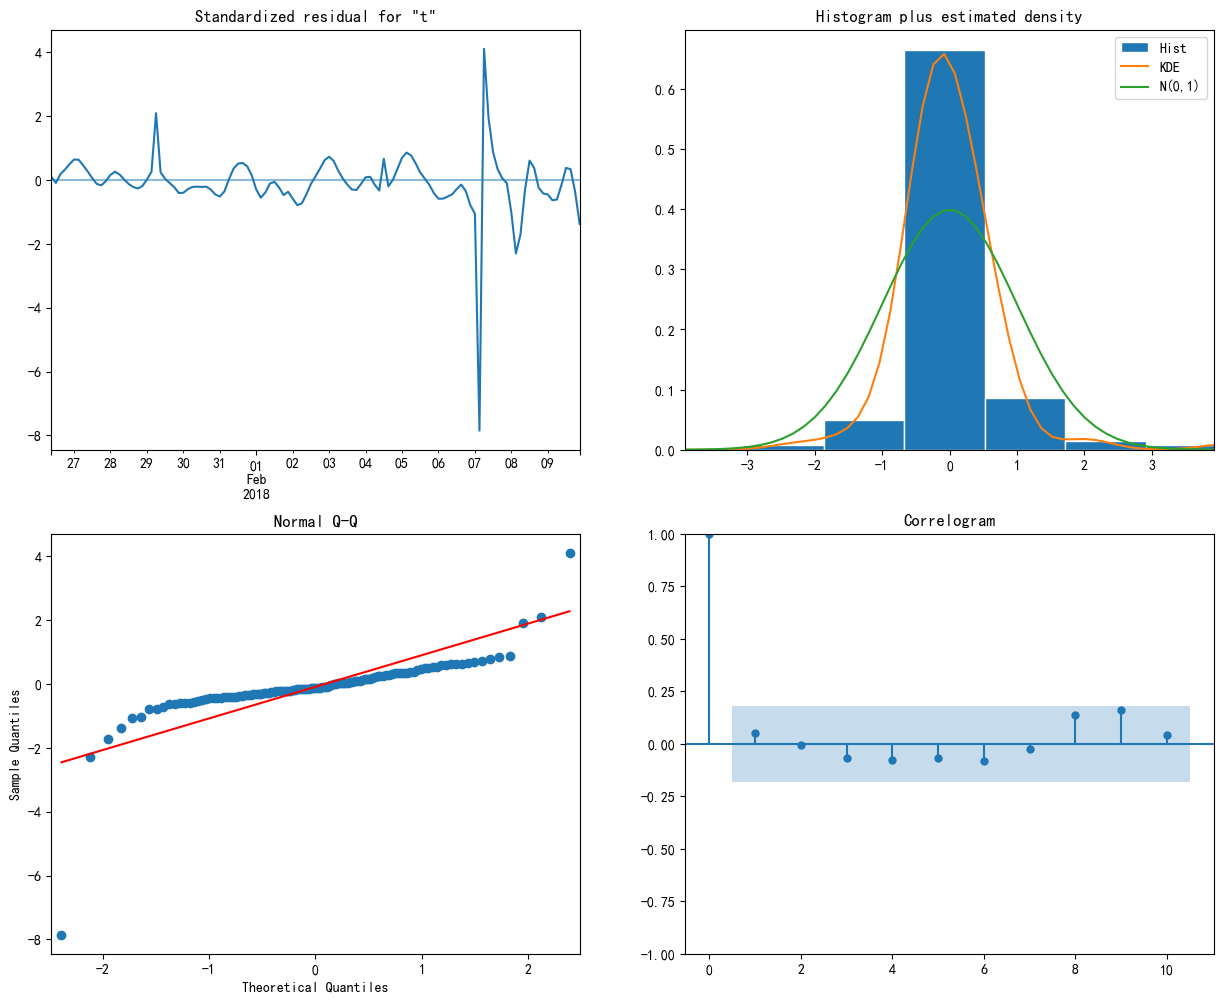

In [31]:
mod = tsa.statespace.sarimax.SARIMAX(trend1,order=(2, 1, 1),seasonal_order=(2, 1, 0, 50))
trend1_result = mod.fit()
test_white_noise(trend1_result.resid)
fig_sesult = trend1_result.plot_diagnostics(figsize=(15,12)) 

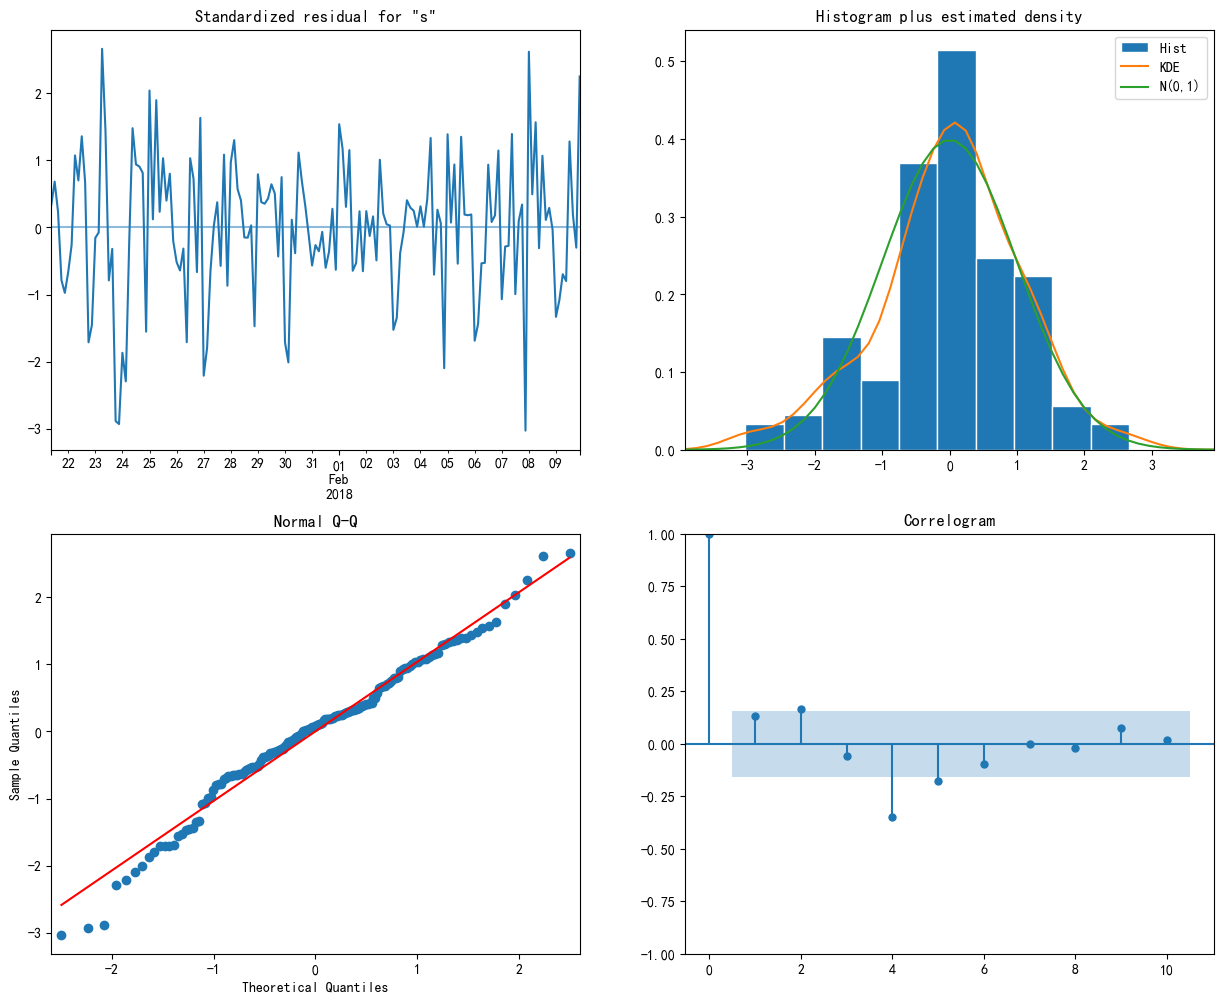

In [33]:
mod = tsa.statespace.sarimax.SARIMAX(seasonal1,order=(2, 1, 0) ,seasonal_order= (2, 1, 1, 10))
seasonal1_result= mod.fit()
test_white_noise(seasonal1_result.resid)

fig_sesult = seasonal1_result.plot_diagnostics(figsize=(15,12)) 

RMSE:47.617767024801076
RMSE:6.9005628049312815
RMSE:949041.1414363872
RMSE:974.1874262360335
RMSE:120302.90373613751
RMSE:346.8470898481599
RMSE:1471320.5742918663
RMSE:1212.9800387029732
单步预测结果


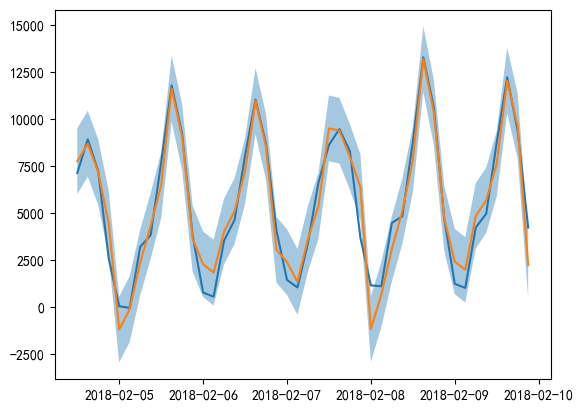

多步预测结果


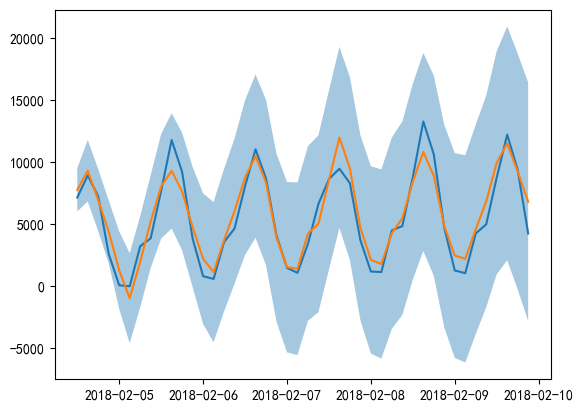

In [38]:

# 单步预测
pres_1 = get_prediction(trend1, trend1_result, '2018-02-04 12:00:00')
    
    # 多步预测（动态预测）
pres_2 = get_prediction(seasonal1, seasonal1_result, '2018-02-04 12:00:00' )

pre_1 = pres_1+pres_2

pres_1_1 = get_prediction(trend1, trend1_result,'2018-02-04 12:00:00', dynamic=True)
    
    # 多步预测（动态预测）
pres_2_2 = get_prediction(seasonal1, seasonal1_result,'2018-02-04 12:00:00', dynamic=True)

pre_1_2 = pres_1_1+pres_2_2
print("单步预测结果")
plot_prediction(pre_1)
print("多步预测结果")
plot_prediction(pre_1_2)


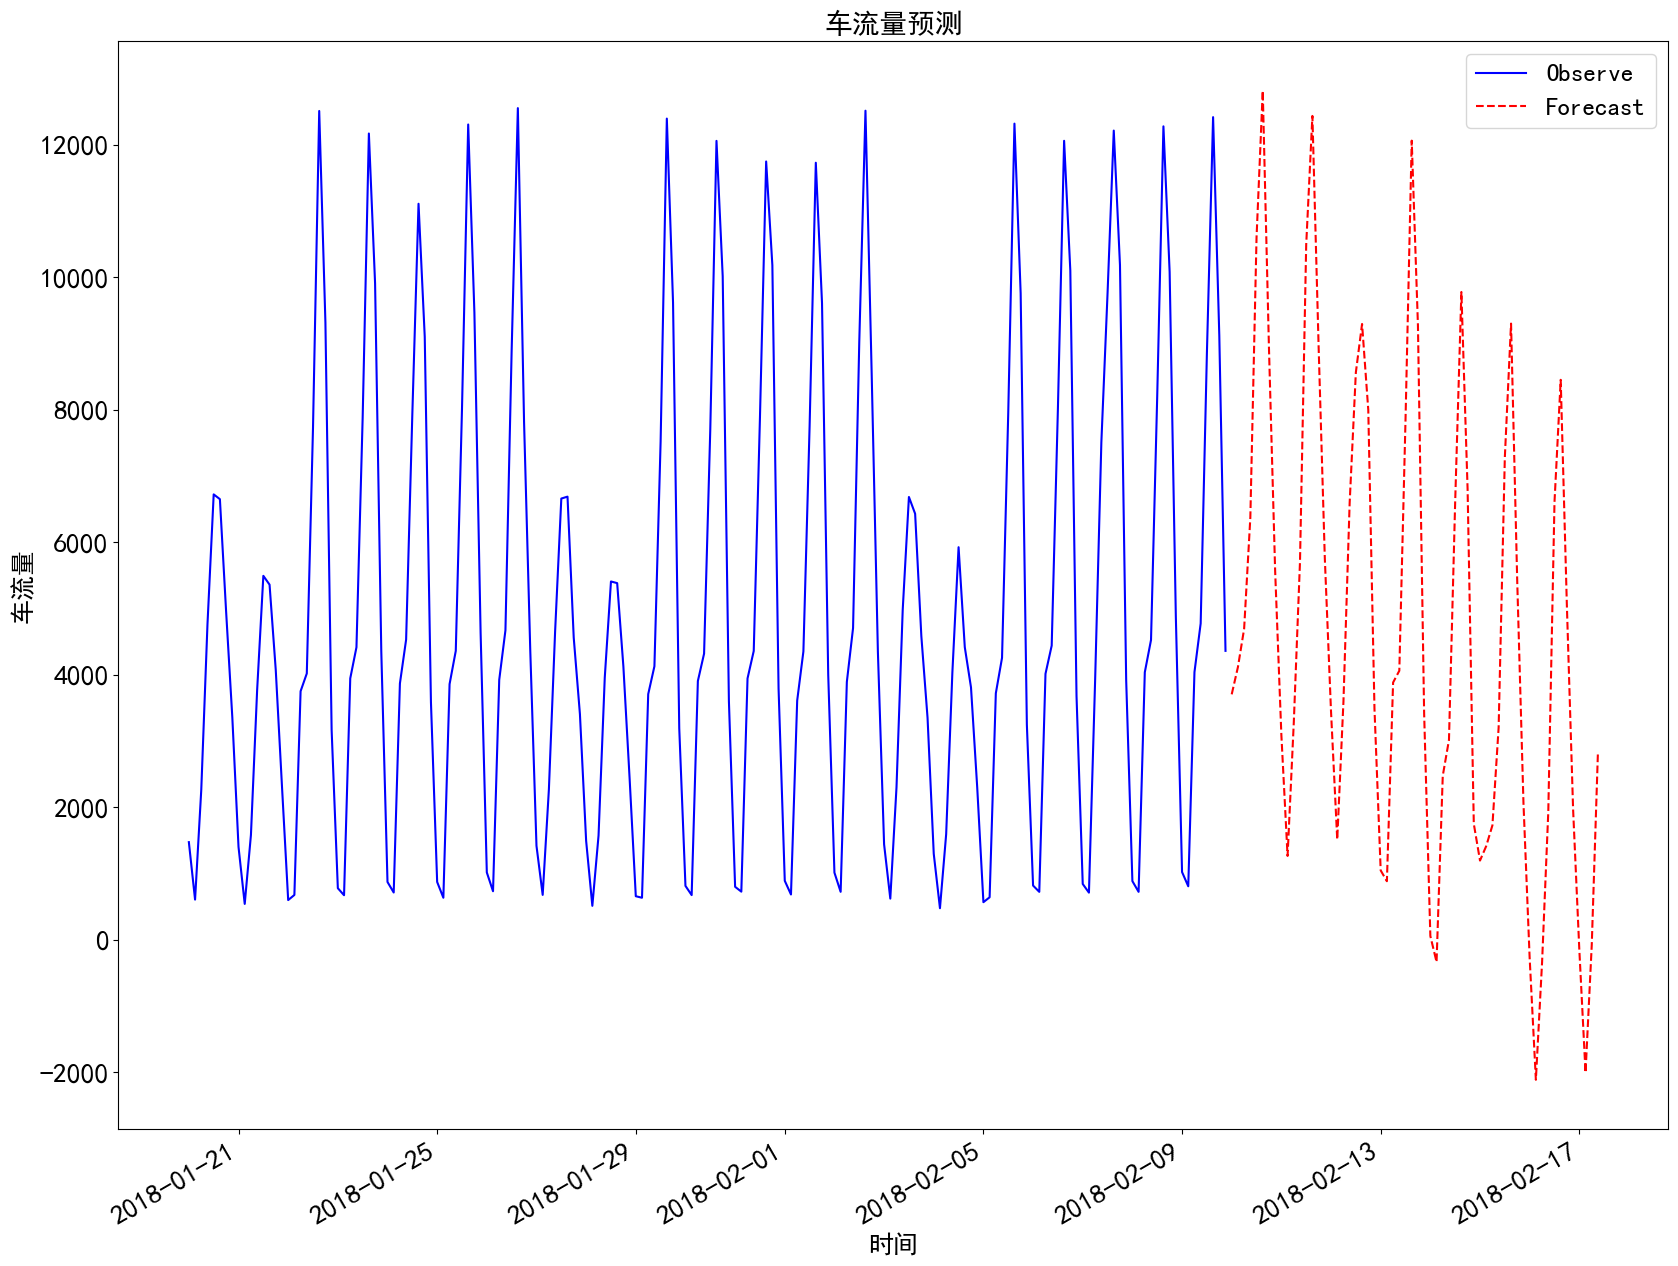

In [54]:
import matplotlib.pyplot as plt

# 假设 seasonal1_forecast 和 trend1_forecast 是两个 PredictionResultsWrapper 对象

seasonal1_forecast = seasonal1_result.get_forecast(steps=60)
trend1_forecast = trend1_result.get_forecast(steps=60)

# 确保索引匹配，然后逐元素相加
forecast_mean = seasonal1_forecast.predicted_mean + trend1_forecast.predicted_mean
forecast_conf_int = seasonal1_forecast.conf_int().add(trend1_forecast.conf_int())

fig, ax = plt.subplots(figsize=(20, 16))
ax.plot(flow1, label='Observe', color='blue')  # 观察数据线
forecast_mean.plot(ax=ax, label='Forecast', color='red', linestyle='--')  # 预测数据线
ax.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], alpha=0.4)
ax.set_xlabel("时间", fontsize=18)
ax.set_ylabel("车流量", fontsize=18)
ax.legend(loc='best', fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("车流量预测", fontsize=20)  # 添加标题
plt.show()


模型效果得到了显著提升